# Twitter sentiment analysis with Logistic Regression 

Presentamos un modelo de regresión lógistica para el análisis de sentimiento de una tabla de datos de tweets relacionados con empresas específicas. Éste se estructura de la siguiente manera (outline):

1. Transformación de datos inicial
2. Gráfico de características
3. Análisis de texto
4. Modelo de regresión logística

El objetivo principal es presentar un proyecto sencillo de PNL (o NLP) y practicar los principales usos de bibliotecas como `wordcloud`, `sklearn`, `nltk` y `re`.

# Transformación de datos inicial

Note: the stopwords from English were downloaded from the `nltk` library.

In [ ]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
import re 
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

#
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Validation dataset
val = pd.read_csv("twitter_validation.csv", header = None)

#Full dataset for Train-Test
train = pd.read_csv("twitter_training.csv", header = None)

In [ ]:
#
train.head()

Posteriormente, cambiamos el nombre de las columnas para representar los datos proporcionados de los tweets. 

In [ ]:
#
train.columns = ['id','information','type','text']

train.head()

In [ ]:
#

train.shape

In [ ]:
#
val.columns = ['id','information','type','text']

val.head()

In [ ]:
#

val.shape

In [ ]:
#

train_data = train

train_data.head()

In [ ]:
#

val_data = val

val_data.head()

Para preparar los datos para el análisis de texto, se crea una fila adicional utilizando el método `str.lower`. 

Sin embargo, como había algunos textos con valores únicamente numéricos (por ejemplo, casos en los que se twittea sólo números) se utilizó una función para transformar todos los datos a cadena.

Luego, una expresión regular borró los caracteres especiales ya que es común tener problemas de digitalización en Twitter.

In [ ]:
#Text transformation

train_data["lower"] = train_data.text.str.lower() #lowercase

train_data["lower"] = [str(data) for data in train_data.lower] #converting all to string

In [ ]:
#

train_data["lower"] = train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

# [^A-Za-z0-9 ]+: Esta expresión regular selecciona cualquier carácter que no sea una letra alfabética 
#      (mayúscula o minúscula), un número o un espacio en blanco. El símbolo ^ al inicio dentro de los 
#      corchetes indica "cualquier carácter que no sea uno de los siguientes".
# ' ': Los caracteres seleccionados por la expresión regular se reemplazan por un espacio en blanco.
# x: Es el texto sobre el cual se aplica la expresión regular y la sustitución.

In [ ]:
#Text transformation

val_data["lower"] = val_data.text.str.lower() #lowercase

val_data["lower"] = [str(data) for data in val_data.lower] #converting all to string

val_data["lower"] = val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [ ]:
# Las diferencias entre las dos columnas de texto se presentan en la siguiente tabla.

train_data#.tail()

# Plotting features

Para identificar las palabras principales que se utilizaron por etiqueta, se utilizó una **nube de palabras** para ver cuáles son las palabras más importantes en los datos de entrenamiento. 

Por ejemplo, en la etiqueta positiva palabras como amor y juego se utilizaron mayoritariamente junto con una amplia variedad de palabras clasificadas como "buenos sentimientos".

## Positive

In [ ]:
#

word_cloud_text = ' '.join( train_data[ train_data["type"] == "Positive" ].lower )

word_cloud_text

In [ ]:
# Creation of wordcloud with a API services
# https://amueller.github.io/word_cloud/index.html

wordcloud = WordCloud(
            max_font_size    = 100,
            max_words        = 100,
            background_color = "black",
            scale            = 10,
            width            = 800,
            height           = 800
).generate( word_cloud_text )


In [ ]:
# Figure properties

plt.figure( figsize = ( 10, 10 ) )

plt.imshow( wordcloud, interpolation = "bilinear" )

plt.axis("off")

plt.show()

## Negative

In [ ]:
#

word_cloud_text = ' '.join(train_data[train_data["type"] == "Negative"].lower)

word_cloud_text

In [ ]:
# Creation of wordcloud with a API services
# https://amueller.github.io/word_cloud/index.html

wordcloud = WordCloud(
            max_font_size    = 100,
            max_words        = 100,
            background_color = "black",
            scale            = 10,
            width            = 800,
            height           = 800
).generate( word_cloud_text )

In [ ]:
# Figure properties

plt.figure( figsize = (10,10) )

plt.imshow( wordcloud, interpolation = "bilinear" )

plt.axis( "off" )

plt.show()

## Irrelevant

In [ ]:
#

word_cloud_text = ' '.join( train_data[ train_data["type"] == "Irrelevant" ].lower )

word_cloud_text

In [ ]:
# Creation of wordcloud with a API services
# https://amueller.github.io/word_cloud/index.html

wordcloud = WordCloud(
            max_font_size    = 100,
            max_words        = 100,
            background_color = "black",
            scale            = 10,
            width            = 800,
            height           = 800
).generate( word_cloud_text )


In [ ]:
# Figure properties

plt.figure( figsize = (10, 10) )

plt.imshow( wordcloud, interpolation = "bilinear")

plt.axis("off")

plt.show()

## Neutral

In [ ]:
#

word_cloud_text = ' '.join( train_data[ train_data["type"] == "Neutral" ].lower )

word_cloud_text

In [ ]:
# Creation of wordcloud with a API services
# https://amueller.github.io/word_cloud/index.html

wordcloud = WordCloud(
            max_font_size    = 100,
            max_words        = 100,
            background_color = "black",
            scale            = 10,
            width            = 800,
            height           = 800
).generate( word_cloud_text )


In [ ]:
# Figure properties

plt.figure( figsize = (10, 10) )

plt.imshow( wordcloud, interpolation = "bilinear" )

plt.axis("off")

plt.show()

## The number of tweets 

In [ ]:
#Count information per category

plot1 = train.groupby( by = ["information", "type"] ).count().reset_index()

plot1.head()

In [ ]:
#Figure of comparison per branch

plt.figure( figsize = (20, 6) )

sns.barplot( data = plot1, x = "information", y = "id", hue = "type" )

plt.xticks( rotation = 90 )

plt.xlabel("Brand")

plt.ylabel("Number of tweets")

plt.grid()

plt.title("Distribution of tweets per Branch and Type")

plt.show()

# Text analysis

Con el texto limpio, se contó la cantidad inicial de tokens únicos para identificar la complejidad del modelo. 

Tal como se presenta, hay más de 30 mil palabras únicas.

In [ ]:
# Text splitting

tokens_text = [ word_tokenize( str(word) ) for word in train_data.lower ]

tokens_text

In [ ]:
#

tokens_text[1]

In [ ]:
# Unique word counter

tokens_counter = [item for sublist in tokens_text for item in sublist]

print("Number of tokens: ", len(set(tokens_counter)))

In [ ]:
# Choosing english stopwords

stopwords_nltk = nltk.corpus.stopwords

stop_words = stopwords_nltk.words('english')

stop_words#[:5]

# Logistic Regression model

Para el modelo de regresión utilizamos una regresión logística simple de la biblioteca `sklearn` junto con el enfoque Bag of Words (BoW). 

Este último método ayuda a clasificar y agrupar los datos relevantes para ayudar al modelo a identificar las tendencias adecuadas.

En este primer BoW, las palabras vacías se consideraron junto con un valor predeterminado ngram de 1.

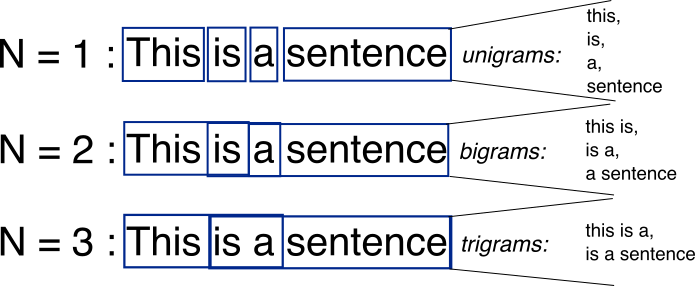

In [ ]:
#Initial Bag of Words

bow_counts = CountVectorizer(
    tokenizer   = word_tokenize,
    stop_words  = stop_words, #English Stopwords
    ngram_range = (1, 1) #analysis of one word
)

bow_counts

**Luego, los datos principales se dividieron en conjuntos de datos de entrenamiento y de prueba junto con la codificación de las palabras utilizando el conjunto de datos de entrenamiento como referencia:**

In [ ]:
#Train - Test splitting

reviews_train, reviews_test = train_test_split( train_data, test_size = 0.2, random_state = 0 )

In [ ]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)

X_train_bow

In [ ]:
#Transformation of test dataset with train encoding

X_test_bow = bow_counts.transform(reviews_test.lower)

X_test_bow

In [ ]:
#Labels for train and test encoding

y_train_bow = reviews_train['type']

y_train_bow

In [ ]:
#Labels for train and test encoding

y_test_bow = reviews_test['type']

y_test_bow

In [ ]:
# El número total de tuits de cada categoría muestra que los negativos y positivos son los más registrados 
# mientras que los irrelevantes son los menos registrados.
# Total of registers per category

y_train_bow.value_counts() / y_train_bow.shape[0]

In [ ]:
# El número total de tuits de cada categoría muestra que los negativos y positivos son los más registrados 
# mientras que los irrelevantes son los menos registrados.
# Total of registers per category

y_test_bow.value_counts() / y_test_bow.shape[0]

In [ ]:
# Logistic regression

model1 = LogisticRegression( C = 1, solver = "liblinear", max_iter = 200 )

model1.fit( X_train_bow, y_train_bow )

In [ ]:
# Prediction

train_pred = model1.predict(X_train_bow)

print("Accuracy: ", accuracy_score(y_train_bow, train_pred) * 100)

In [ ]:
# Prediction

test_pred = model1.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

In [ ]:
# Validation data

X_val_bow = bow_counts.transform(val_data.lower)

y_val_bow = val_data['type']

In [ ]:
#

X_val_bow

In [ ]:
#

Val_res = model1.predict(X_val_bow)

print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Finalmente, se utilizó otra Bolsa de Palabras. Este tuvo un n-grama de 4 sin clasificar las palabras vacías, utilizando toda la información disponible.

In [ ]:
#Initial Bag of Words

bow_counts = CountVectorizer(
    tokenizer   = word_tokenize,
    stop_words  = stop_words, #English Stopwords
    ngram_range = (1, 4) #analysis of one word
)

bow_counts

In [ ]:
#Data labeling

X_train_bow = bow_counts.fit_transform(reviews_train.lower)

X_test_bow = bow_counts.transform(reviews_test.lower)

X_val_bow = bow_counts.transform(val_data.lower)

In [ ]:
# Logistic regression

model1 = LogisticRegression( C = 0.9, solver = "liblinear", max_iter = 200 )#1500

model1.fit( X_train_bow, y_train_bow )

In [ ]:
# Prediction

train_pred_2 = model1.predict(X_train_bow)

print("Accuracy: ", accuracy_score(y_train_bow, train_pred_2) * 100)

In [ ]:
# Prediction

test_pred_2 = model1.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

In [ ]:
#

Val_res_2 = model1.predict(X_val_bow)

print("Accuracy: ", accuracy_score(y_val_bow, Val_res_2) * 100)